In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('online_retail.csv', encoding='ISO-8859-1')
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,01-12-2010 08:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,01-12-2010 08:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,01-12-2010 08:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,01-12-2010 08:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,01-12-2010 08:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,09-12-2011 12:50,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,09-12-2011 12:50,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,09-12-2011 12:50,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,09-12-2011 12:50,4.15,12680.0,France


## General Data Exploration

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [4]:
df['InvoiceDate']=pd.to_datetime(df['InvoiceDate'], format='%d-%m-%Y %H:%M', errors='coerce')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [5]:
# Remove duplicates
df = df.drop_duplicates()

# Handle numeric columns
numeric_cols = df.select_dtypes(include=['number']).columns
df[numeric_cols] = df[numeric_cols].fillna(df[numeric_cols].mean())


df.dropna(subset = ['CustomerID'], inplace = True)
# Handle non-numeric columns
non_numeric_cols = df.select_dtypes(exclude=['number']).columns
df[non_numeric_cols] = df[non_numeric_cols].fillna("Unknown")

# Verify changes
print(df.info())

C:\Users\Vansh\AppData\Local\Temp\ipykernel_28552\4195084930.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[numeric_cols] = df[numeric_cols].fillna(df[numeric_cols].mean())
C:\Users\Vansh\AppData\Local\Temp\ipykernel_28552\4195084930.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.dropna(subset = ['CustomerID'], inplace = True)


<class 'pandas.core.frame.DataFrame'>
Index: 536641 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    536641 non-null  object        
 1   StockCode    536641 non-null  object        
 2   Description  536641 non-null  object        
 3   Quantity     536641 non-null  int64         
 4   InvoiceDate  536641 non-null  datetime64[ns]
 5   UnitPrice    536641 non-null  float64       
 6   CustomerID   536641 non-null  float64       
 7   Country      536641 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 36.8+ MB
None


C:\Users\Vansh\AppData\Local\Temp\ipykernel_28552\4195084930.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[non_numeric_cols] = df[non_numeric_cols].fillna("Unknown")


In [6]:
df['Country'].nunique()

38

In [7]:
df['Country'].value_counts()

Country
United Kingdom          490300
Germany                   9480
France                    8541
EIRE                      8184
Spain                     2528
Netherlands               2371
Belgium                   2069
Switzerland               1994
Portugal                  1510
Australia                 1258
Norway                    1086
Italy                      803
Channel Islands            757
Finland                    695
Cyprus                     611
Sweden                     461
Unspecified                442
Austria                    401
Denmark                    389
Japan                      358
Poland                     341
Israel                     294
USA                        291
Hong Kong                  284
Singapore                  229
Iceland                    182
Canada                     151
Greece                     146
Malta                      127
United Arab Emirates        68
European Community          61
RSA                         58


In [8]:
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France


## Revenue Analysis

### Total revenue by product

In [9]:
df['Revenue'] = df['Quantity'] * df['UnitPrice']
product_revenue = df.groupby('Description')['Revenue'].sum().sort_values(ascending=False)
top_products = product_revenue.head(10)
top_products

C:\Users\Vansh\AppData\Local\Temp\ipykernel_28552\1347201210.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Revenue'] = df['Quantity'] * df['UnitPrice']


Description
DOTCOM POSTAGE                        206245.48
REGENCY CAKESTAND 3 TIER              164459.49
WHITE HANGING HEART T-LIGHT HOLDER     99612.42
PARTY BUNTING                          98243.88
JUMBO BAG RED RETROSPOT                92175.79
RABBIT NIGHT LIGHT                     66661.63
POSTAGE                                66230.64
PAPER CHAIN KIT 50'S CHRISTMAS         63715.24
ASSORTED COLOUR BIRD ORNAMENT          58792.42
CHILLI LIGHTS                          53746.66
Name: Revenue, dtype: float64

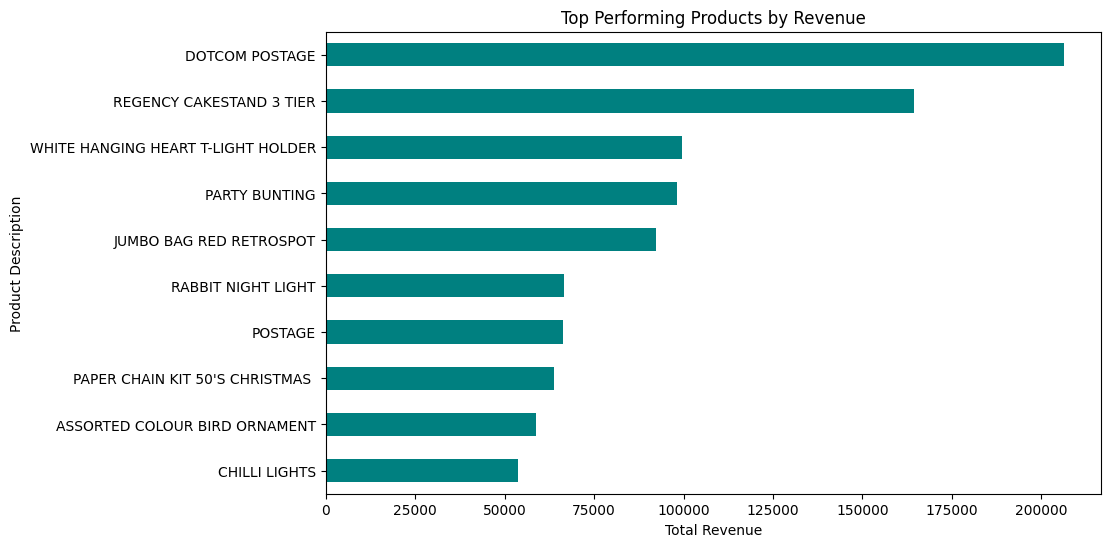

In [10]:
plt.figure(figsize=(10, 6))
top_products.plot(kind='barh', color='teal')
plt.title('Top Performing Products by Revenue')
plt.xlabel('Total Revenue')
plt.ylabel('Product Description')
plt.gca().invert_yaxis()  # Invert to display the top products at the top
plt.show()

### Total revenue by geographical location

In [11]:
country_revenue = df.groupby('Country')['Revenue'].sum().sort_values(ascending=False)
country_revenue[:9]

Country
United Kingdom    8167128.184
Netherlands        284661.540
EIRE               262993.380
Germany            221509.470
France             197317.110
Australia          137009.770
Switzerland         56363.050
Spain               54756.030
Belgium             40910.960
Name: Revenue, dtype: float64

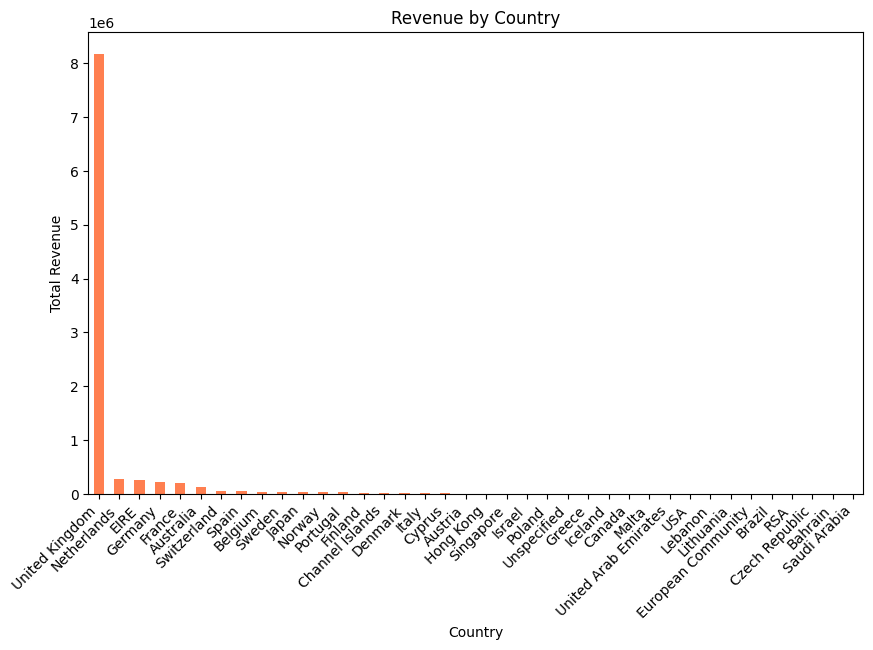

In [12]:
plt.figure(figsize=(10, 6))
country_revenue.plot(kind='bar', color='coral')
plt.title('Revenue by Country')
plt.xlabel('Country')
plt.ylabel('Total Revenue')
plt.xticks(rotation=45, ha='right')
plt.show()

### Total revenue by Customers

In [13]:
customer_revenue = df.groupby('CustomerID')['Revenue'].sum().sort_values(ascending=False)
customer_rev=customer_revenue.head(10)
customer_rev

CustomerID
15281.160818    1447487.53
14646.000000     279489.02
18102.000000     256438.49
17450.000000     187322.17
14911.000000     132458.73
12415.000000     123725.45
14156.000000     113214.59
17511.000000      88125.38
16684.000000      65892.08
13694.000000      62690.54
Name: Revenue, dtype: float64

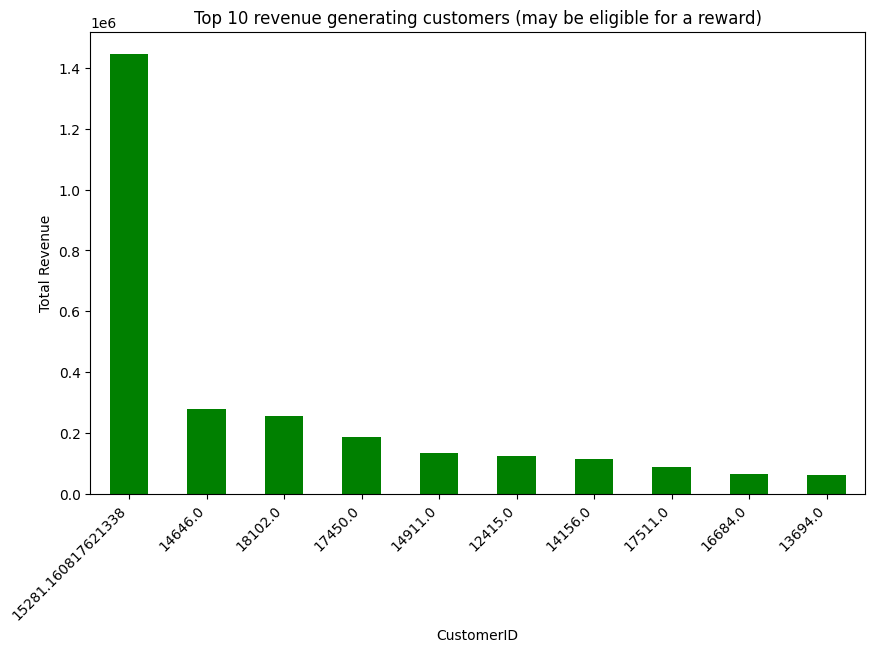

In [14]:
plt.figure(figsize=(10, 6))
customer_rev.plot(kind='bar', color='green')
plt.title('Top 10 revenue generating customers (may be eligible for a reward)')
plt.xlabel('CustomerID')
plt.ylabel('Total Revenue')
plt.xticks(rotation=45, ha='right')
plt.show()

In [15]:
# Define segments based on revenue quantiles
customer_revenue_segmented = customer_revenue.reset_index()
customer_revenue_segmented['Segment'] = pd.qcut(
    customer_revenue_segmented['Revenue'], 
    q=3,  # Divide into 3 segments
    labels=['Low Value', 'Medium Value', 'High Value']
)

# Display the top 10 customers with their segment
customer_revenue_segmented_top10 = customer_revenue_segmented.head(10)
customer_revenue_segmented_top10

,CustomerID,Revenue,Segment
0,15281.160818,1447487.53,High Value
1,14646.000000,279489.02,High Value
2,18102.000000,256438.49,High Value
3,17450.000000,187322.17,High Value
4,14911.000000,132458.73,High Value
5,12415.000000,123725.45,High Value
6,14156.000000,113214.59,High Value
7,17511.000000,88125.38,High Value
8,16684.000000,65892.08,High Value
9,13694.000000,62690.54,High Value


In [16]:
df_segments=customer_revenue_segmented.groupby('Segment').count()
df_segments

C:\Users\Vansh\AppData\Local\Temp\ipykernel_28552\3164175694.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_segments=customer_revenue_segmented.groupby('Segment').count()


,CustomerID,Revenue
Segment,,
Low Value,1458,1458
Medium Value,1457,1457
High Value,1458,1458


C:\Users\Vansh\AppData\Local\Temp\ipykernel_28552\1338863458.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Segment', y='CustomerID', data=df_segments, palette='viridis')


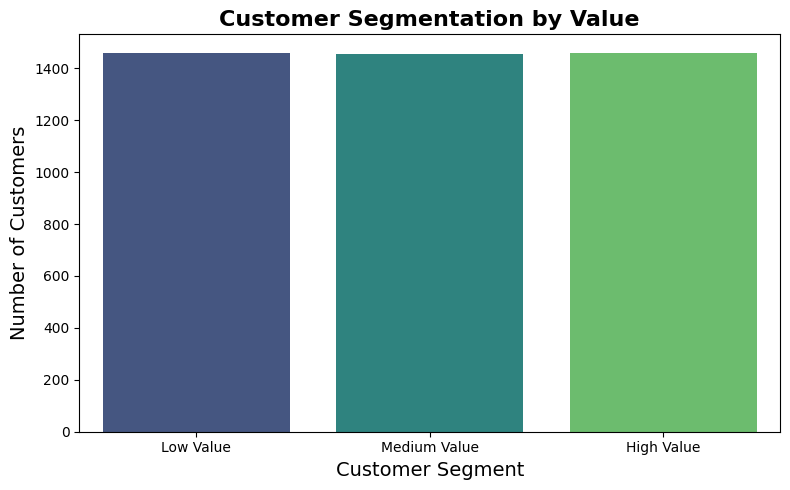

In [17]:
plt.figure(figsize=(8, 5))

# Create a bar plot
sns.barplot(x='Segment', y='CustomerID', data=df_segments, palette='viridis')

# Customize the title and labels
plt.title('Customer Segmentation by Value', fontsize=16, fontweight='bold')
plt.xlabel('Customer Segment', fontsize=14)
plt.ylabel('Number of Customers', fontsize=14)

# Show the plot
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()

### Exploring negative revenue sources

Entries with negative revenue

In [18]:
negative_revenue = df[df['Revenue'] < 0]
negative_revenue

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Revenue
141,C536379,D,Discount,-1,2010-12-01 09:41:00,27.50,14527.0,United Kingdom,-27.50
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,2010-12-01 09:49:00,4.65,15311.0,United Kingdom,-4.65
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,2010-12-01 10:24:00,1.65,17548.0,United Kingdom,-19.80
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom,-6.96
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom,-6.96
...,...,...,...,...,...,...,...,...,...
540449,C581490,23144,ZINC T-LIGHT HOLDER STARS SMALL,-11,2011-12-09 09:57:00,0.83,14397.0,United Kingdom,-9.13
541541,C581499,M,Manual,-1,2011-12-09 10:28:00,224.69,15498.0,United Kingdom,-224.69
541715,C581568,21258,VICTORIAN SEWING BOX LARGE,-5,2011-12-09 11:57:00,10.95,15311.0,United Kingdom,-54.75
541716,C581569,84978,HANGING HEART JAR T-LIGHT HOLDER,-1,2011-12-09 11:58:00,1.25,17315.0,United Kingdom,-1.25


Items with total revenue in negative numbers.

In [19]:
negative_revenue_summary = df.groupby('Description')['Revenue'].sum().sort_values(ascending=True)
negative_revenue_summary[negative_revenue_summary<0]

Description
AMAZON FEE                            -221520.500
Manual                                 -69031.640
Adjust bad debt                        -11062.060
CRUK Commission                         -7933.430
Bank Charges                            -7175.639
Discount                                -5696.220
SAMPLES                                 -3039.650
WHITE CHERRY LIGHTS                       -54.000
CREAM SWEETHEART MAGAZINE RACK            -46.850
WOODEN BOX ADVENT CALENDAR                -45.700
ASSORTED TUTTI FRUTTI ROUND BOX           -39.600
PINK CHERRY LIGHTS                        -27.000
BLUE PADDED SOFT MOBILE                   -25.500
ANTIQUE LILY FAIRY LIGHTS                 -14.850
CREAM SWEETHEART TRAYS                    -12.750
TEA TIME CAKE STAND IN GIFT BOX           -10.750
CREAM SWEETHEART SHELF + HOOKS             -7.950
PINK SMALL GLASS CAKE STAND                -5.850
SWEETHEART KEY CABINET                     -5.550
FLAMINGO LIGHTS                       

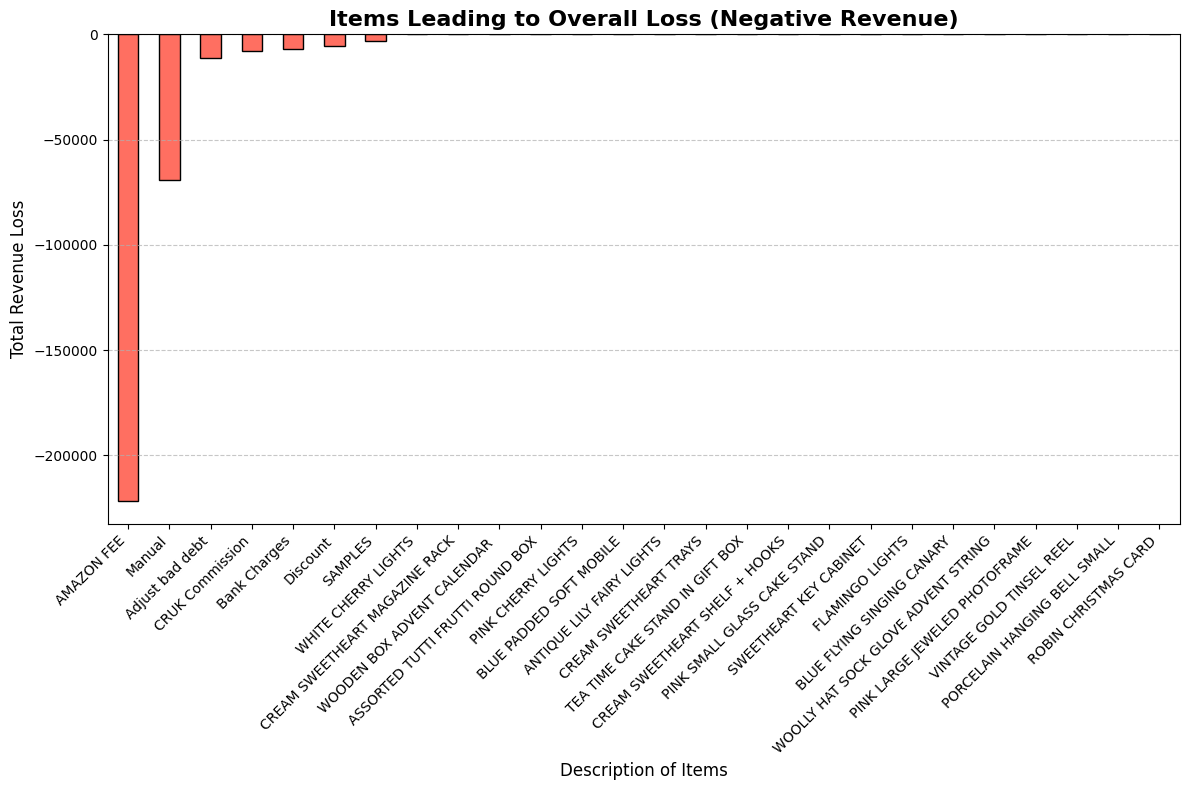

In [20]:
plt.figure(figsize=(12, 8))
negative_revenue_summary[negative_revenue_summary < 0].plot(
    kind='bar', 
    color='#FF6F61',
    edgecolor='black'
)
plt.title('Items Leading to Overall Loss (Negative Revenue)', fontsize=16, fontweight='bold')
plt.xlabel('Description of Items', fontsize=12)
plt.ylabel('Total Revenue Loss', fontsize=12)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


## Marketing Effectiveness

### Customer Acquisition and Retention
Analyze the frequency of purchases (number of invoices) per customer to assess customer loyalty and identify frequent buyers.

In [21]:
# Group by CustomerID to count unique InvoiceNos (frequency of purchases)
customer_frequency = df.groupby('CustomerID')['InvoiceNo'].nunique().sort_values(ascending=False)

# Summary statistics for customer frequency
print("Summary statistics for purchase frequency:")
customer_frequency

Summary statistics for purchase frequency:


CustomerID
15281.160818    3710
14911.000000     248
12748.000000     224
17841.000000     169
14606.000000     128
                ... 
14581.000000       1
14582.000000       1
16738.000000       1
16737.000000       1
15300.000000       1
Name: InvoiceNo, Length: 4373, dtype: int64

In [22]:
customer_frequency.describe()

count    4373.000000
mean        5.922708
std        56.798813
min         1.000000
25%         1.000000
50%         3.000000
75%         5.000000
max      3710.000000
Name: InvoiceNo, dtype: float64

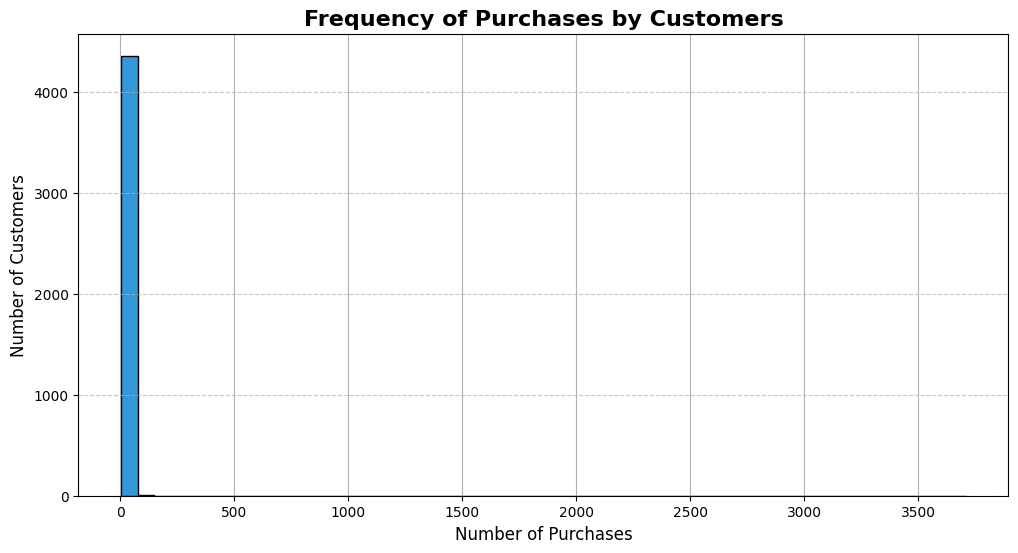

In [23]:
# Plot the frequency of purchases
plt.figure(figsize=(12, 6))
customer_frequency.hist(bins=50, color='#3498db', edgecolor='black')
plt.title('Frequency of Purchases by Customers', fontsize=16, fontweight='bold')
plt.xlabel('Number of Purchases', fontsize=12)
plt.ylabel('Number of Customers', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

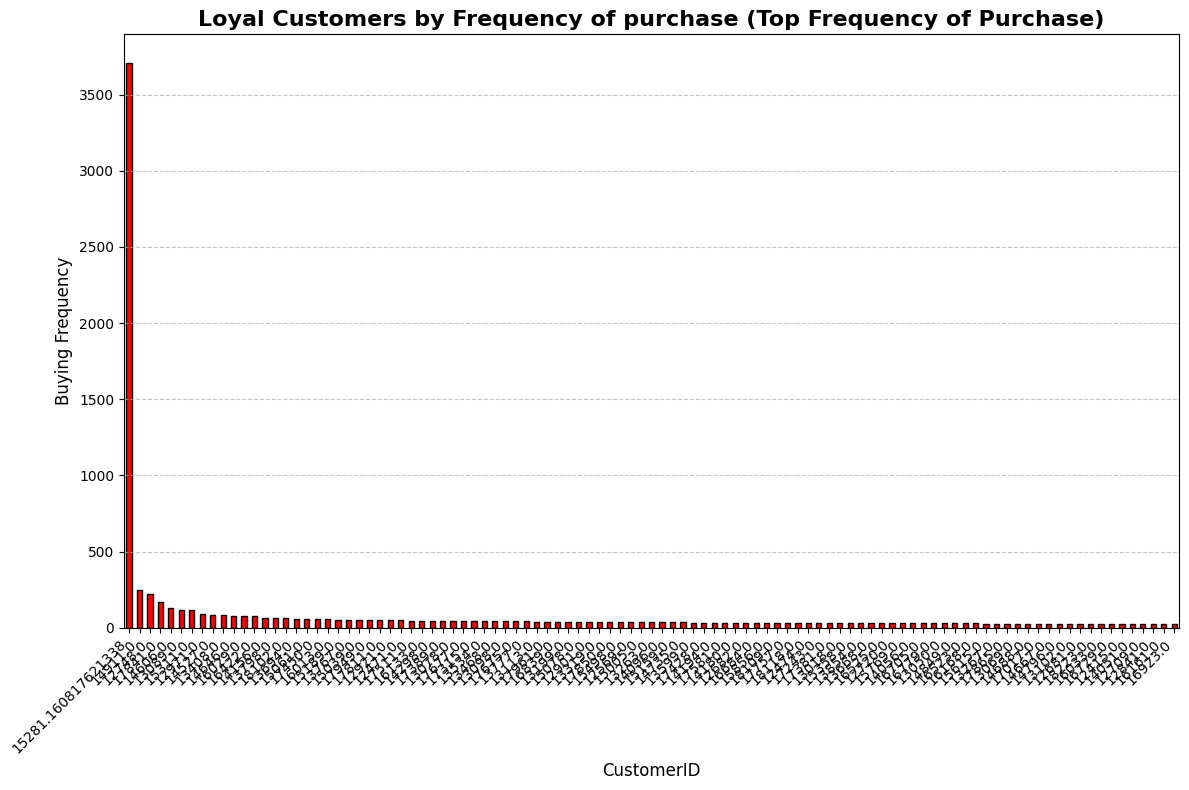

In [24]:
plt.figure(figsize=(12, 8))
customer_frequency[customer_frequency>25].plot(
    kind='bar', 
    color='red',  # A vibrant coral color
    edgecolor='black'
)
plt.title('Loyal Customers by Frequency of purchase (Top Frequency of Purchase)', fontsize=16, fontweight='bold')
plt.xlabel('CustomerID', fontsize=12)
plt.ylabel('Buying Frequency', fontsize=12)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


### Analyzing Fast Moving products
Fast-moving products are those purchased most frequently, regardless of revenue. We can calculate this by summing up the quantities sold for each product.

In [25]:
# Calculate total quantity sold per product
fast_moving_products = df.groupby('Description')['Quantity'].sum().sort_values(ascending=False).head(10)
fast_moving_products

Description
WORLD WAR 2 GLIDERS ASSTD DESIGNS     53751
JUMBO BAG RED RETROSPOT               47260
POPCORN HOLDER                        36322
ASSORTED COLOUR BIRD ORNAMENT         36282
PACK OF 72 RETROSPOT CAKE CASES       36016
WHITE HANGING HEART T-LIGHT HOLDER    35298
RABBIT NIGHT LIGHT                    30631
MINI PAINT SET VINTAGE                26437
PACK OF 12 LONDON TISSUES             26299
PACK OF 60 PINK PAISLEY CAKE CASES    24719
Name: Quantity, dtype: int64

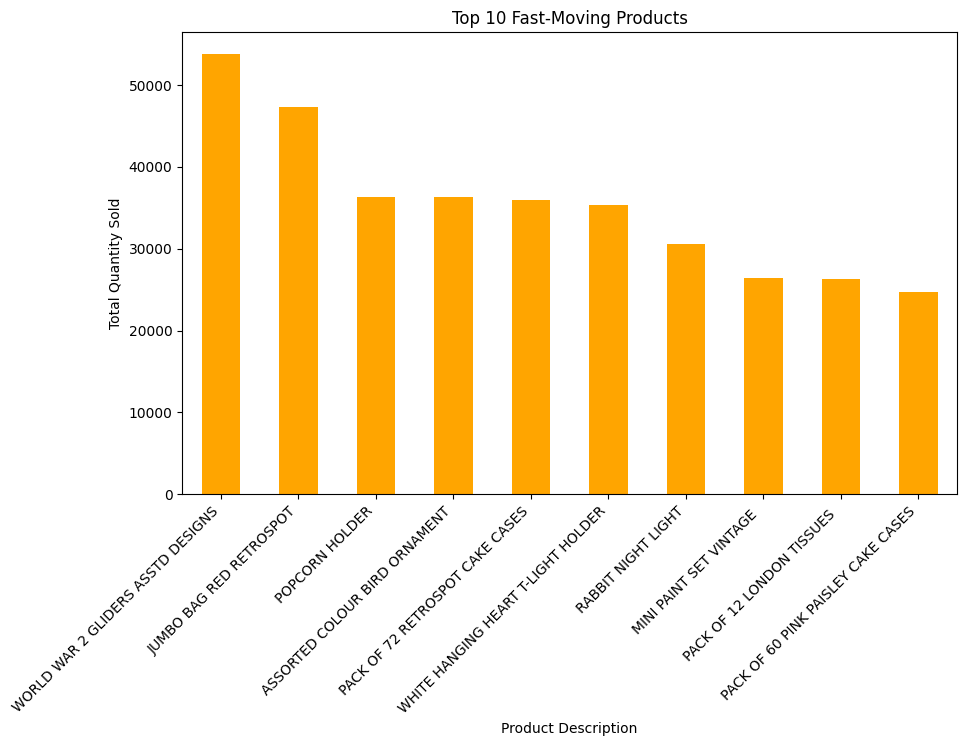

In [26]:
plt.figure(figsize=(10, 6))
fast_moving_products.plot(kind='bar', color='orange')
plt.title('Top 10 Fast-Moving Products')
plt.xlabel('Product Description')
plt.ylabel('Total Quantity Sold')
plt.xticks(rotation=45, ha='right')
plt.show()


### Analyze Average Order Value (AOV) by Country
AOV is calculated as the total revenue divided by the total number of invoices for each country.

In [27]:
# Calculate AOV by country
country_aov = df.groupby('Country').agg(
    TotalRevenue=('Revenue', 'sum'),
    TotalInvoices=('InvoiceNo', 'nunique')
)
country_aov['AOV'] = country_aov['TotalRevenue'] / country_aov['TotalInvoices']
country_aov_sorted = country_aov.sort_values(by='AOV', ascending=False)

# Display top countries by AOV
country_aov_sorted.head(10)


,TotalRevenue,TotalInvoices,AOV
Country,,,
Netherlands,284661.54,101,2818.431089
Australia,137009.77,69,1985.648841
Lebanon,1693.88,1,1693.880000
Japan,35340.62,28,1262.165000
Brazil,1143.60,1,1143.600000
RSA,1002.31,1,1002.310000
Singapore,9120.39,10,912.039000
Denmark,18768.14,21,893.720952
Norway,35163.46,40,879.086500


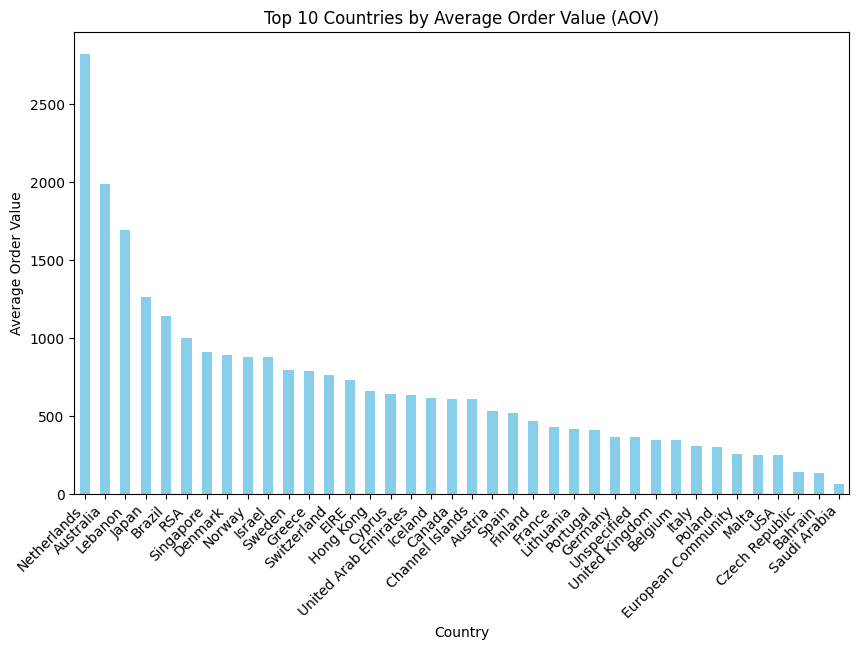

In [28]:
plt.figure(figsize=(10, 6))
country_aov_sorted['AOV'].plot(kind='bar', color='skyblue')
plt.title('Top 10 Countries by Average Order Value (AOV)')
plt.xlabel('Country')
plt.ylabel('Average Order Value')
plt.xticks(rotation=45, ha='right')
plt.show()


### Country Based Segmentation

In [29]:
# Calculate total revenue by country
country_revenue = df.groupby('Country')['Revenue'].sum().sort_values(ascending=False).reset_index()

# Add a column for segmentation based on revenue quantiles
country_revenue['Segment'] = pd.qcut(
    country_revenue['Revenue'], 
    q=5,  # Divide into 5 categories
    labels=['Bottom Tier', 'Low Tier', 'Mid Tier', 'High Tier', 'Top Tier']
)

# Display the segmented country data
country_revenue


,Country,Revenue,Segment
0,United Kingdom,8167128.184,Top Tier
1,Netherlands,284661.540,Top Tier
2,EIRE,262993.380,Top Tier
3,Germany,221509.470,Top Tier
4,France,197317.110,Top Tier
5,Australia,137009.770,Top Tier
6,Switzerland,56363.050,Top Tier
7,Spain,54756.030,Top Tier
8,Belgium,40910.960,High Tier
9,Sweden,36585.410,High Tier


C:\Users\Vansh\AppData\Local\Temp\ipykernel_28552\3978683433.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=country_revenue, x='Segment', palette='coolwarm', order=['Top Tier', 'High Tier', 'Mid Tier', 'Low Tier', 'Bottom Tier'])


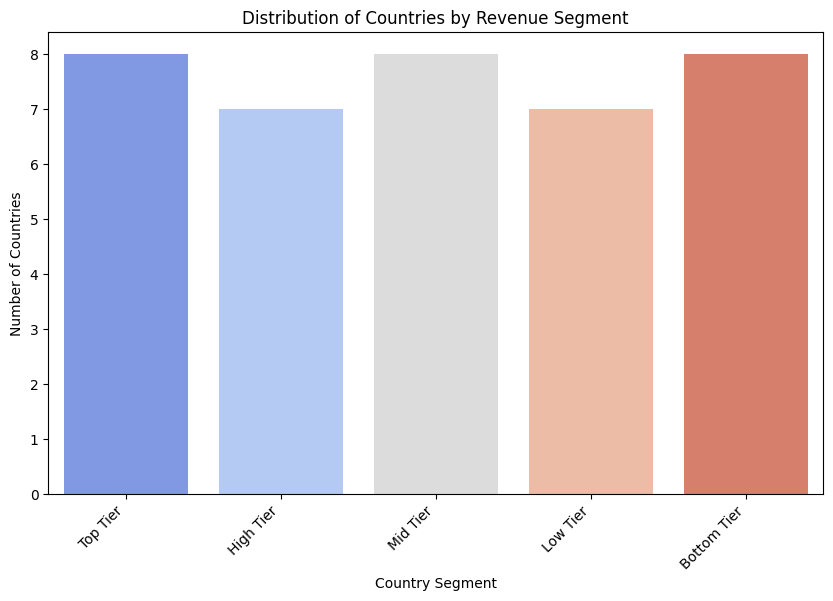

In [30]:
plt.figure(figsize=(10, 6))
sns.countplot(data=country_revenue, x='Segment', palette='coolwarm', order=['Top Tier', 'High Tier', 'Mid Tier', 'Low Tier', 'Bottom Tier'])
plt.title('Distribution of Countries by Revenue Segment')
plt.xlabel('Country Segment')
plt.ylabel('Number of Countries')
plt.xticks(rotation=45, ha='right')
plt.show()


## Future Growth Opportunities

### New Market Expansion: Identifying Emerging Markets
analyzing the countries with lower sales to identify emerging markets. We can focus on countries with low revenue and check if the sales for top-performing products in these regions are relatively lower. These markets may represent opportunities for expansion.

In [31]:
# Identify countries with lower sales, let's take bottom 20% countries
low_revenue_countries = country_revenue[country_revenue['Segment'] == 'Bottom Tier']

# Calculate average sales for each product by country
product_sales_by_country = df.groupby(['Country', 'Description'])['Revenue'].sum().unstack().fillna(0)

# Focus on low revenue countries and top-performing products
top_products = df.groupby('Description')['Revenue'].sum().sort_values(ascending=False).head(10).index

# Filter out product sales for emerging markets (Bottom Tier countries)
emerging_market_opportunities = product_sales_by_country.loc[low_revenue_countries['Country'], top_products]

emerging_market_opportunities


Description,DOTCOM POSTAGE,REGENCY CAKESTAND 3 TIER,WHITE HANGING HEART T-LIGHT HOLDER,PARTY BUNTING,JUMBO BAG RED RETROSPOT,RABBIT NIGHT LIGHT,POSTAGE,PAPER CHAIN KIT 50'S CHRISTMAS,ASSORTED COLOUR BIRD ORNAMENT,CHILLI LIGHTS
Country,,,,,,,,,,
Lebanon,0.0,153.0,0.0,69.75,0.0,0.0,0.0,0.0,0.0,0.0
Lithuania,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0
European Community,0.0,0.0,0.0,0.00,0.0,0.0,141.0,0.0,0.0,0.0
Brazil,0.0,175.2,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0
RSA,0.0,25.5,0.0,19.80,20.8,0.0,0.0,0.0,0.0,0.0
Czech Republic,0.0,0.0,0.0,0.00,0.0,0.0,36.0,0.0,0.0,0.0
Bahrain,0.0,25.5,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0
Saudi Arabia,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0


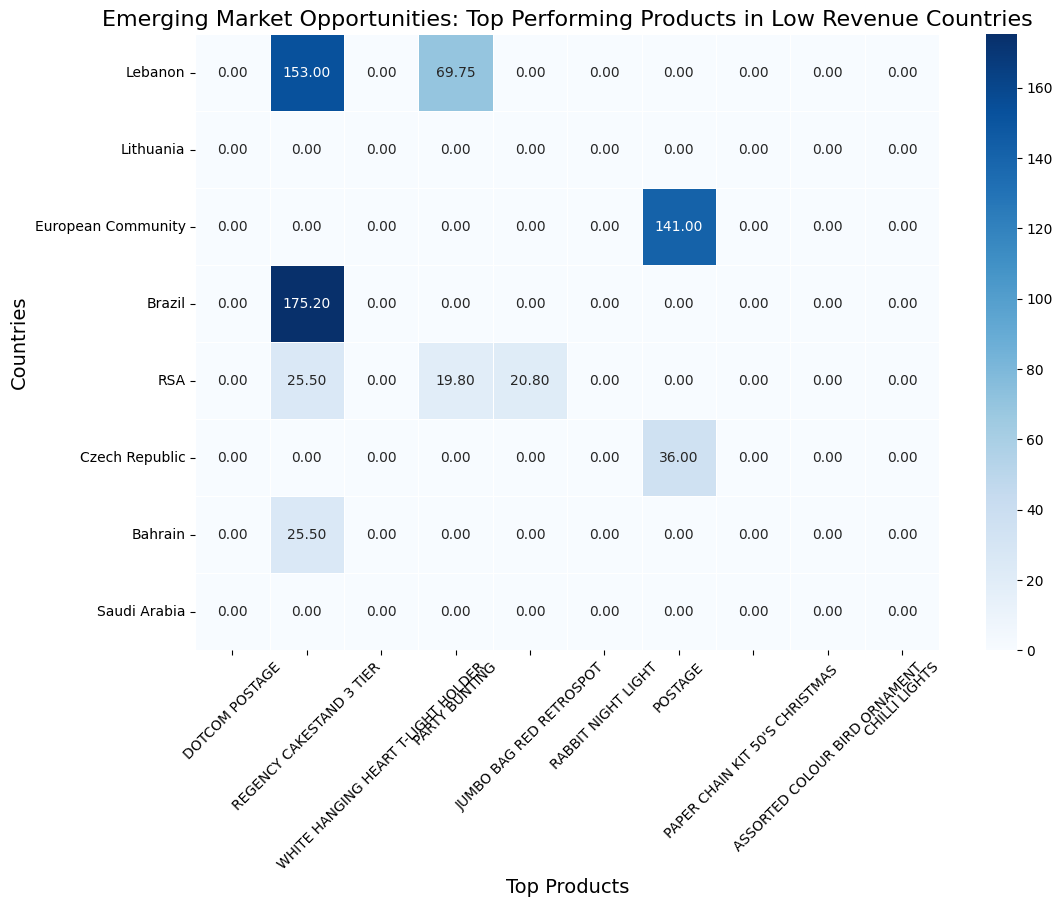

In [32]:
plt.figure(figsize=(12, 8))
sns.heatmap(emerging_market_opportunities, annot=True, fmt='.2f', cmap='Blues', linewidths=0.5)

plt.title('Emerging Market Opportunities: Top Performing Products in Low Revenue Countries', fontsize=16)
plt.xlabel('Top Products', fontsize=14)
plt.ylabel('Countries', fontsize=14)

plt.xticks(rotation=45)
plt.yticks(rotation=0)

plt.show()

### Diversifying Product Offerings: Analyzing Underperforming Products
we will look at the products that are underperforming and analyze their potential. We’ll check the sales in different countries and identify whether certain products consistently underperform in specific regions. This insight can help in deciding whether to improve these products, repackage them, or replace them entirely.

#### Visualization of Underperforming Products Overall in All Countries:

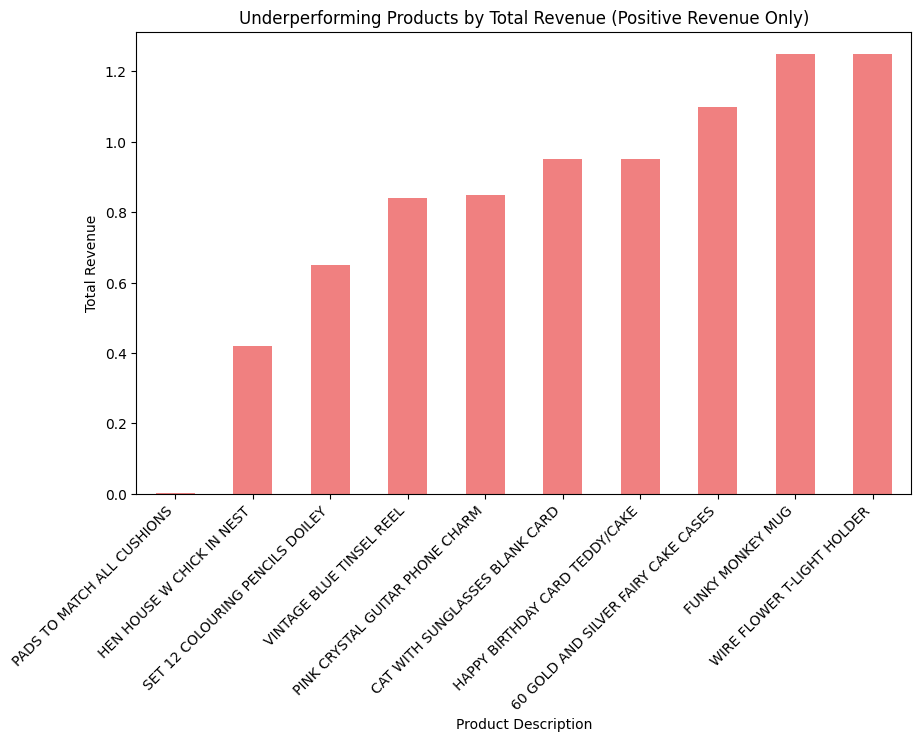

In [33]:
# Filter out rows where Revenue is negative
df_positive_revenue = df[df['Revenue'] > 0]
underperforming_products_overall = df_positive_revenue.groupby('Description')['Revenue'].sum().sort_values(ascending=True).head(10)

# Visualize the total sales of underperforming products with positive revenue
plt.figure(figsize=(10, 6))
underperforming_products_overall.plot(kind='bar', color='lightcoral')
plt.title('Underperforming Products by Total Revenue (Positive Revenue Only)')
plt.xlabel('Product Description')
plt.ylabel('Total Revenue')
plt.xticks(rotation=45, ha='right')
plt.show()


#### Visualization of Underperforming Products Overall in Countries with high sales of these products:

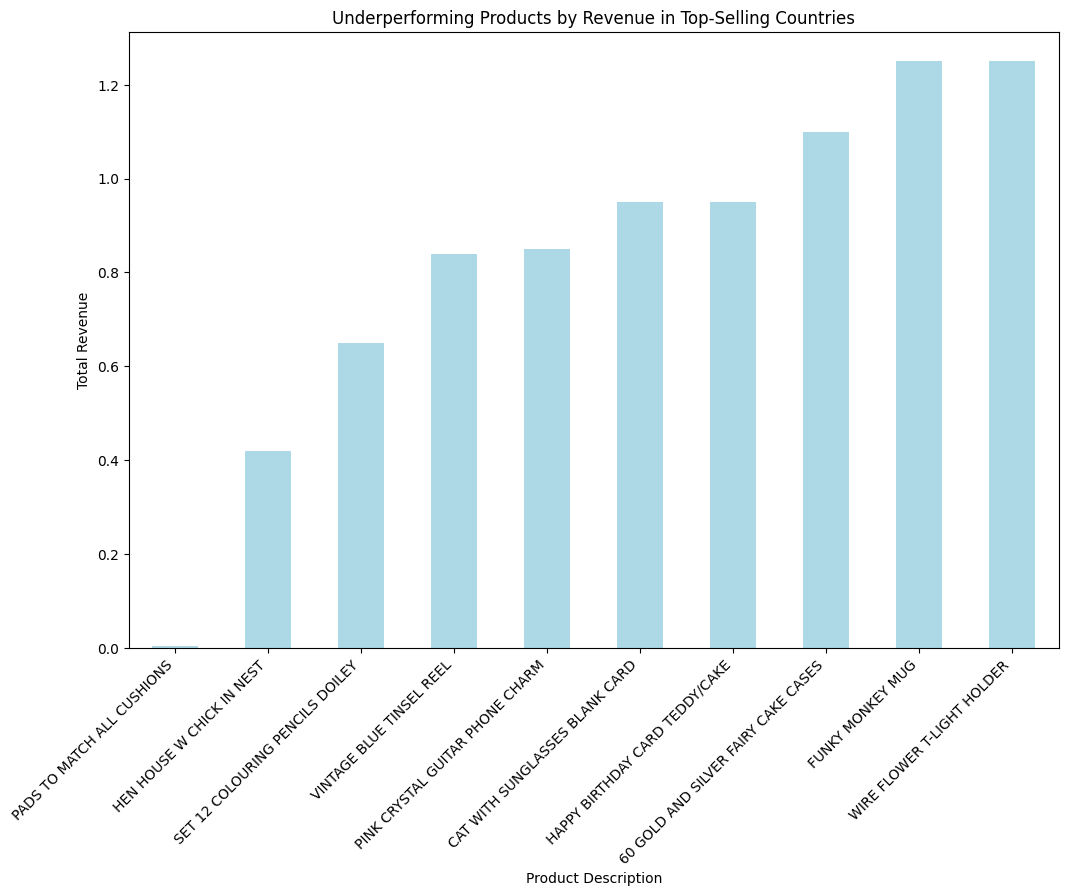

In [34]:
# Identify the countries with the highest sales of the underperforming products
top_countries_for_underperforming_products = df_positive_revenue[df_positive_revenue['Description'].isin(underperforming_products_overall.index)]
top_countries_for_underperforming_products_sales = top_countries_for_underperforming_products.groupby('Country')['Revenue'].sum().sort_values(ascending=False).head(10)

# Filter for top countries where the underperforming products are sold the most
top_countries_data = top_countries_for_underperforming_products[top_countries_for_underperforming_products['Country'].isin(top_countries_for_underperforming_products_sales.index)]

# Summarize the revenue of underperforming products in these countries
top_countries_underperforming_products = top_countries_data.groupby('Description')['Revenue'].sum().sort_values(ascending=True)

# Visualize the underperforming products in top-selling countries
plt.figure(figsize=(12, 8))
top_countries_underperforming_products.plot(kind='bar', color='lightblue')
plt.title('Underperforming Products by Revenue in Top-Selling Countries')
plt.xlabel('Product Description')
plt.ylabel('Total Revenue')
plt.xticks(rotation=45, ha='right')
plt.show()


#### Visualization of Underperforming Products Overall in Countries with low sales of these products:

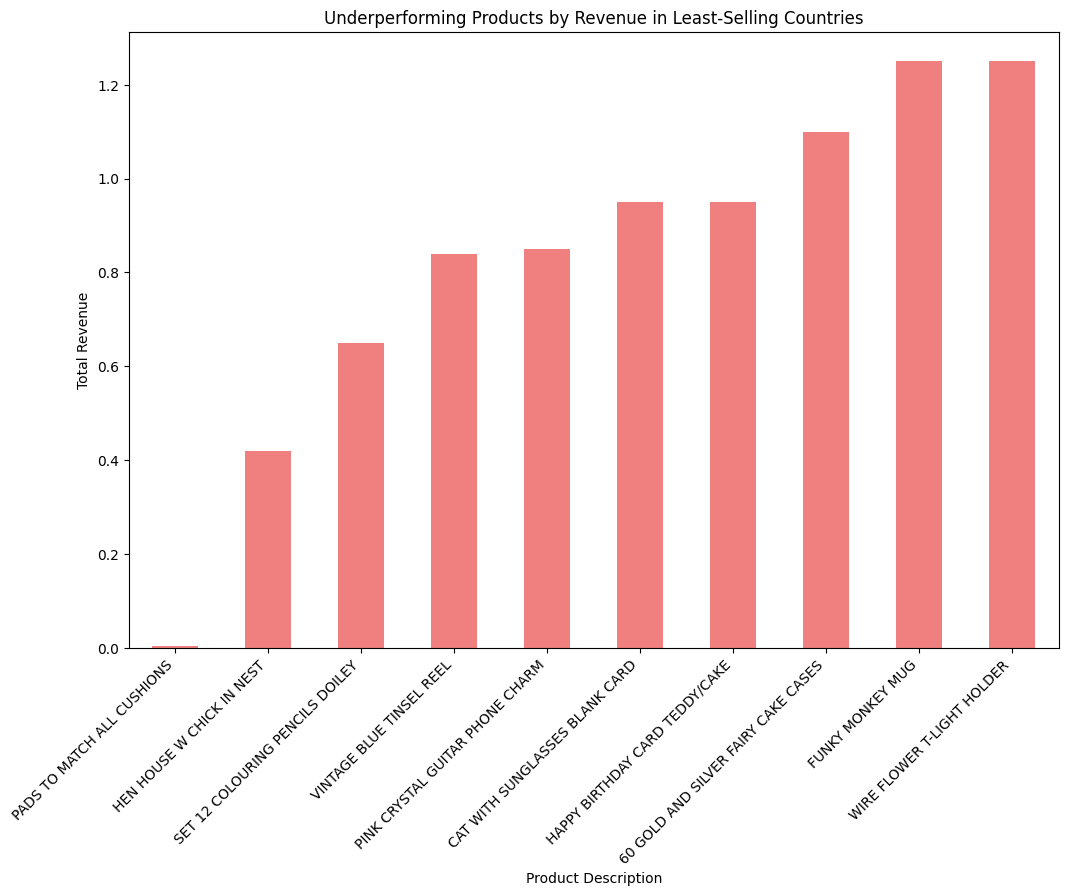

In [35]:
# Identify the countries with the lowest sales of the underperforming products
bottom_countries_for_underperforming_products = df_positive_revenue[df_positive_revenue['Description'].isin(underperforming_products_overall.index)]
bottom_countries_for_underperforming_products_sales = bottom_countries_for_underperforming_products.groupby('Country')['Revenue'].sum().sort_values(ascending=True).head(10)

# Filter for bottom countries where the underperforming products are sold the least
bottom_countries_data = bottom_countries_for_underperforming_products[bottom_countries_for_underperforming_products['Country'].isin(bottom_countries_for_underperforming_products_sales.index)]

# Summarize the revenue of underperforming products in these countries
bottom_countries_underperforming_products = bottom_countries_data.groupby('Description')['Revenue'].sum().sort_values(ascending=True)

# Visualize the underperforming products in least-selling countries
plt.figure(figsize=(12, 8))
bottom_countries_underperforming_products.plot(kind='bar', color='lightcoral')
plt.title('Underperforming Products by Revenue in Least-Selling Countries')
plt.xlabel('Product Description')
plt.ylabel('Total Revenue')
plt.xticks(rotation=45, ha='right')
plt.show()
